In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv('Fraud data FY 2023-24 for B&CC.xlsx - Fraud data.csv')
data['Fraud Category'] = data['Fraud Category'].str.strip().str.title()

data.fillna('Unknown', inplace=True)

date_cols = ['POLICYRISKCOMMENCEMENTDATE', 'Date of Death', 'INTIMATIONDATE']
for col in date_cols:
    data[col] = pd.to_datetime(data[col], errors='coerce')
    
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Dummy Policy No             1321 non-null   int64         
 1   ASSURED_AGE                 1321 non-null   int64         
 2   NOMINEE_RELATION            1321 non-null   object        
 3   OCCUPATION                  1321 non-null   object        
 4   POLICY SUMASSURED           1321 non-null   object        
 5   Premium                     1321 non-null   object        
 6   PREMIUMPAYMENTMODE          1321 non-null   object        
 7   Annual Income               1321 non-null   object        
 8   HOLDERMARITALSTATUS         1321 non-null   object        
 9   INDIV_REQUIREMENTFLAG       1321 non-null   object        
 10  Policy Term                 1321 non-null   int64         
 11  Policy Payment Term         1321 non-null   int64       

C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\3911623112.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna('Unknown', inplace=True)
C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\3911623112.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')
C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\3911623112.py:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col], errors='coerce')


In [5]:
data.drop(columns=["Bank code"], axis=1, inplace=True)

In [6]:
data.columns

Index(['Dummy Policy No', 'ASSURED_AGE', 'NOMINEE_RELATION', 'OCCUPATION',
       'POLICY SUMASSURED', 'Premium', 'PREMIUMPAYMENTMODE', 'Annual Income',
       'HOLDERMARITALSTATUS', 'INDIV_REQUIREMENTFLAG', 'Policy Term',
       'Policy Payment Term', 'CORRESPONDENCECITY', 'CORRESPONDENCESTATE',
       'CORRESPONDENCEPOSTCODE', 'Product Type', 'CHANNEL',
       'POLICYRISKCOMMENCEMENTDATE', 'Date of Death', 'INTIMATIONDATE',
       'STATUS', 'SUB_STATUS', 'Fraud Category'],
      dtype='object')

In [7]:
# nat_count = data['POLICYRISKCOMMENCEMENTDATE'].isna().sum()
# print(f"Count of NaT values: {nat_count}")
# data.dropna(subset=['POLICYRISKCOMMENCEMENTDATE'], inplace=True)

In [8]:
# tt = data['POLICYRISKCOMMENCEMENTDATE'].isna().sum()
# print(f"Count of NaT values: {tt}")

In [9]:
# nat_coun = data['Date of Death'].isna().sum()
# print(f"Count of NaT values: {nat_coun}")
# data.dropna(subset=['Date of Death'], inplace=True)

# nat_cou = data['INTIMATIONDATE'].isna().sum()
# print(f"Count of NaT values:a {nat_cou}")
# data.dropna(subset=['INTIMATIONDATE'], inplace=True)
# print(f"Count of NaT values: {nat_cou}")

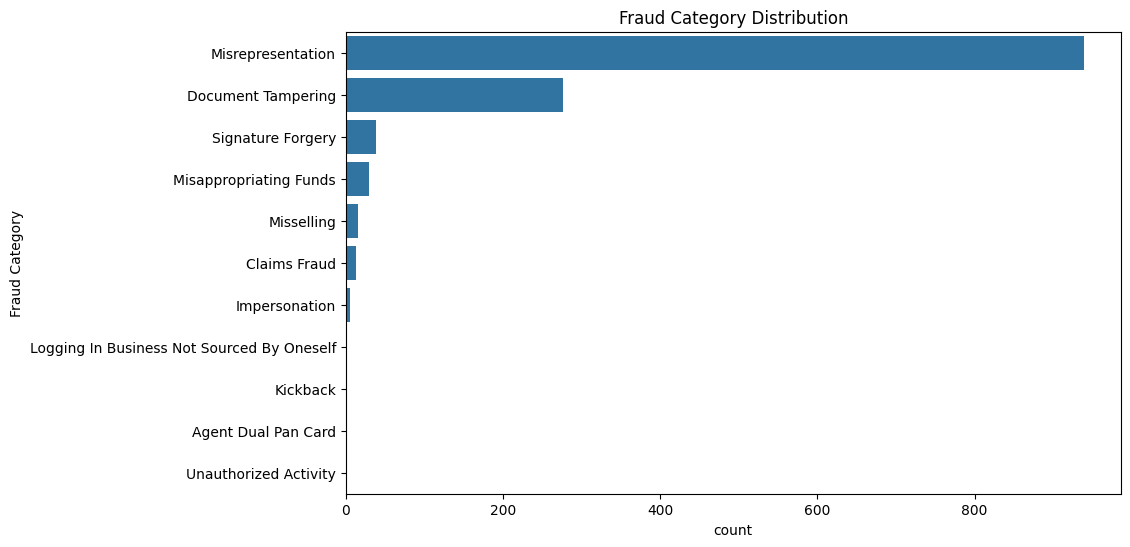

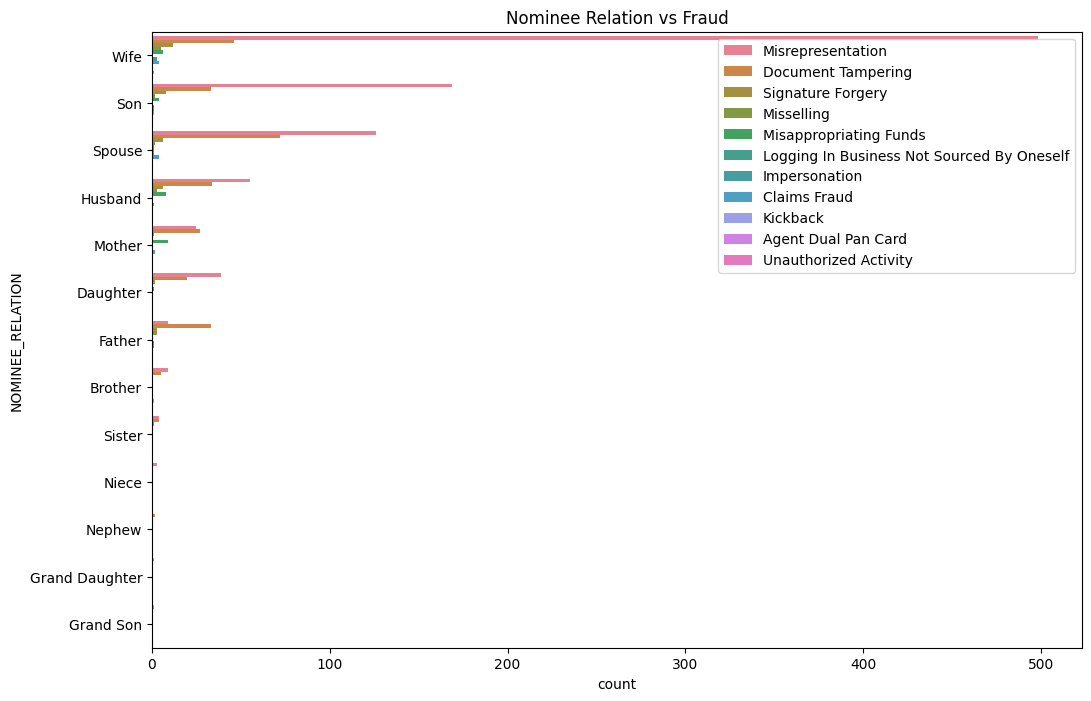

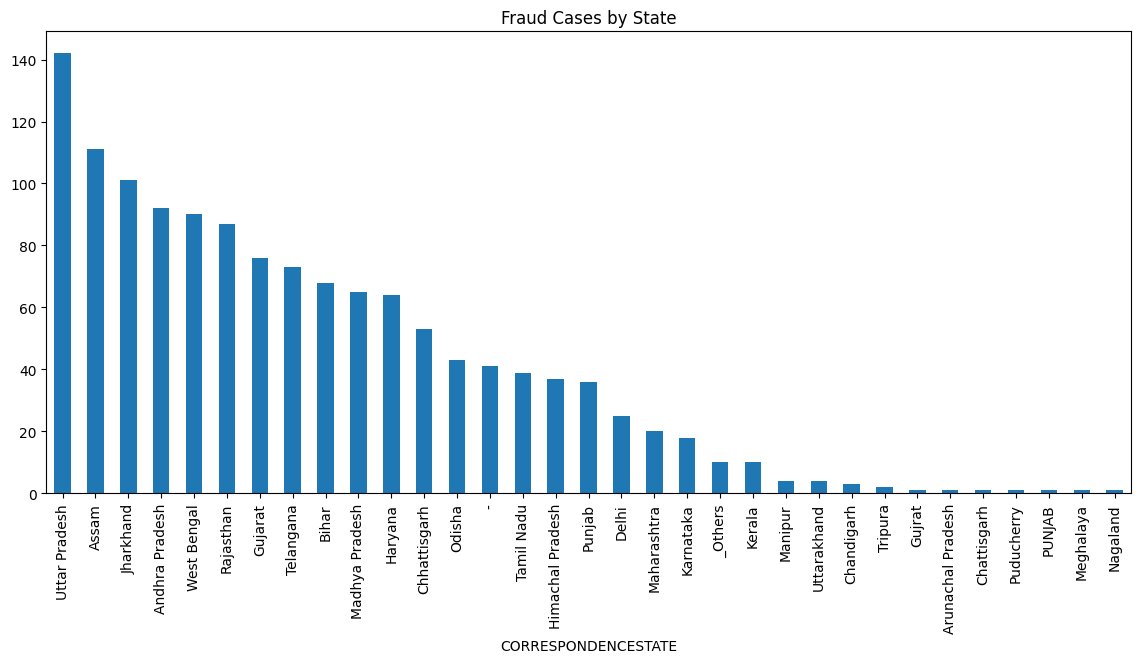

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Fraud Category', order=data['Fraud Category'].value_counts().index)
plt.title('Fraud Category Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='NOMINEE_RELATION', hue='Fraud Category', order=data['NOMINEE_RELATION'].value_counts().index)
plt.title('Nominee Relation vs Fraud')
plt.legend(loc='upper right')
plt.show()

fraud_by_state = data.groupby('CORRESPONDENCESTATE')['Fraud Category'].count().sort_values(ascending=False)
fraud_by_state.plot(kind='bar', figsize=(14, 6), title='Fraud Cases by State')
plt.show()

In [11]:
columns_to_clean = ['Premium', 'Annual Income']
for col in columns_to_clean:
    data[col] = data[col].str.replace('"', '', regex=True)  
    data[col] = data[col].str.replace(',', '', regex=True)  
    data[col] = data[col].str.strip() 
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("\nNaN Values After Cleaning:")
print(data[columns_to_clean].isna().sum())

print("\nCleaned Data Sample:")
print(data[columns_to_clean].head(10))

data.dropna(subset=columns_to_clean, inplace=True)


NaN Values After Cleaning:
Premium          0
Annual Income    0
dtype: int64

Cleaned Data Sample:
   Premium  Annual Income
0   120000         420000
1     5000         180000
2     5000         249000
3     5000         360000
4     5000         600000
5     5000         250000
6     5000         240000
7    50000         780000
8   200000         816000
9    99000         960000


In [12]:
# data.dropna(subset=columns_to_clean, inplace=True)

# # Verify that there are no NaN values in the specified columns
# print(data[columns_to_clean].isna().sum())

In [13]:
# Map Fraud Severity
severity_mapping = {
    'Misrepresentation': 'Low',
    'Document Tampering': 'High',
    'Signature Forgery': 'Medium',
    'Misappropriating Funds': 'High'
}
data['Fraud Severity'] = data['Fraud Category'].map(severity_mapping)

data['POLICYRISKCOMMENCEMENTDATE'] = pd.to_datetime(data['POLICYRISKCOMMENCEMENTDATE'], errors='coerce')

data['Policy Age'] = (pd.to_datetime('today') - data['POLICYRISKCOMMENCEMENTDATE']).dt.days

data['Premium_to_Income_Ratio'] = data['Premium'] / data['Annual Income']

data.drop(columns=['POLICYRISKCOMMENCEMENTDATE', 'Date of Death', 'INTIMATIONDATE'], inplace=True)

print(data[['Fraud Severity', 'Policy Age', 'Premium_to_Income_Ratio']].head())

  Fraud Severity  Policy Age  Premium_to_Income_Ratio
0            Low       480.0                 0.285714
1            Low      1026.0                 0.027778
2            Low       898.0                 0.020080
3            Low       726.0                 0.013889
4            Low       639.0                 0.008333


In [14]:
data["Fraud Severity"].value_counts()

Fraud Severity
Low       939
High      305
Medium     39
Name: count, dtype: int64

In [15]:
data.head()

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCESTATE,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,STATUS,SUB_STATUS,Fraud Category,Fraud Severity,Policy Age,Premium_to_Income_Ratio
0,1,20,Mother,Service,"1,200,000",120000,Quarterly,420000,Single,Non Medical,...,Jharkhand,816115,ULIP,Retail Agency,Claim,Death Claim Repudiated,Misrepresentation,Low,480.0,0.285714
1,2,33,Husband,Service,"350,000",5000,Yearly,180000,Married,Non Medical,...,Madhya Pradesh,464001,Traditional,Retail Agency,Claim,Death Claim Repudiated,Misrepresentation,Low,1026.0,0.027778
2,3,34,Wife,Self-Employed,"350,000",5000,Yearly,249000,Married,Non Medical,...,West Bengal,731238,Traditional,Retail Agency,Claim,Death Claim Repudiated,Misrepresentation,Low,898.0,0.020080
3,4,34,Wife,Service,"325,000",5000,Yearly,360000,Married,Non Medical,...,Uttar Pradesh,281504,Traditional,Retail Agency,Claim,Death Claim Repudiated,Misrepresentation,Low,726.0,0.013889
4,5,54,Husband,Housewife,"100,000",5000,Yearly,600000,Married,Non Medical,...,Tamil Nadu,606001,Traditional,Retail Agency,Claim,Death Claim Repudiated,Misrepresentation,Low,639.0,0.008333


In [16]:
data["OCCUPATION"].value_counts()

OCCUPATION
Service                           700
Business                          213
Agriculturist                     127
Retired                            88
Housewife                          70
Self-Employed                      65
Profession                         29
Student                            19
Defense Retired                     6
Construction Labour                 1
Other Arm Forces Except Police      1
Family Pension                      1
Army                                1
Name: count, dtype: int64

In [17]:
data["CHANNEL"].value_counts()

CHANNEL
Bancassurance             858
Retail Agency             429
Institutional Alliance     30
Mail and Others             4
Name: count, dtype: int64

In [18]:
data["STATUS"].value_counts()

STATUS
Cancellation       1003
Inforce             186
Lapse                59
Claim                46
Withdrawal           12
Technical Lapse       5
Maturity              5
Terminated            3
Rejection             2
Name: count, dtype: int64

In [19]:
data["SUB_STATUS"].value_counts()

SUB_STATUS
Other Reason                     1000
-                                 190
Surrendered Reinvested Auto        49
Death Claim Repudiated             40
Free Look Cancellation             12
                                    9
Death Claim Paid                    4
Refunded                            3
Declined                            2
Disinvested Unpaid                  2
Dishonour                           2
Disinvested Paid                    2
Paid Up                             2
Intimated Death Claim               1
Surrendered                         1
Intimated Death Claim-Annuity       1
Unpaid                              1
Name: count, dtype: int64

In [20]:
data["HOLDERMARITALSTATUS"].value_counts()

HOLDERMARITALSTATUS
Married     1201
Single        92
widowed       26
divorced       2
Name: count, dtype: int64

In [21]:
data["PREMIUMPAYMENTMODE"].value_counts()

PREMIUMPAYMENTMODE
Yearly         1256
Half yearly      27
Single           16
Monthly          15
Quarterly         7
Name: count, dtype: int64

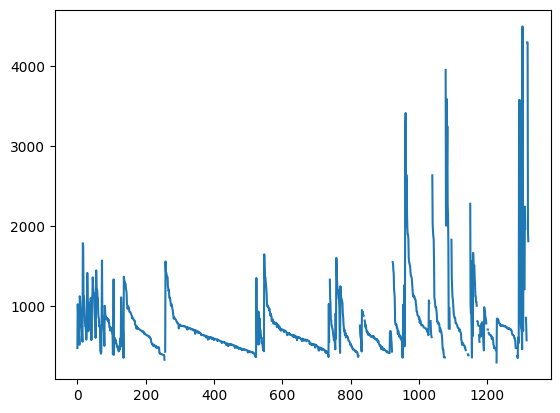

In [22]:
plt.plot(data["Policy Age"])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data.drop(columns=['Fraud Category'])
y = data['Fraud Category']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

                        precision    recall  f1-score   support

          Claims Fraud       0.00      0.00      0.00         4
    Document Tampering       0.76      1.00      0.86        47
         Impersonation       0.00      0.00      0.00         3
Misappropriating Funds       1.00      0.67      0.80         3
     Misrepresentation       0.99      1.00      1.00       198
            Misselling       0.00      0.00      0.00         7
     Signature Forgery       1.00      0.67      0.80         3

              accuracy                           0.94       265
             macro avg       0.54      0.48      0.49       265
          weighted avg       0.90      0.94      0.92       265

Accuracy: 0.939622641509434


C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_train_imputed)

anomalies = iso_forest.predict(X_test_imputed)
anomalies = pd.Series(anomalies).map({1: 'Normal', -1: 'Anomaly'})
print(anomalies.value_counts())

Normal     249
Anomaly     16
Name: count, dtype: int64


In [25]:
%pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
from pytesseract import image_to_string

def extract_text(image_path):
    img = cv2.imread(image_path)
    return image_to_string(img)

document_path = ''
extracted_text = extract_text(document_path)
print(extracted_text)

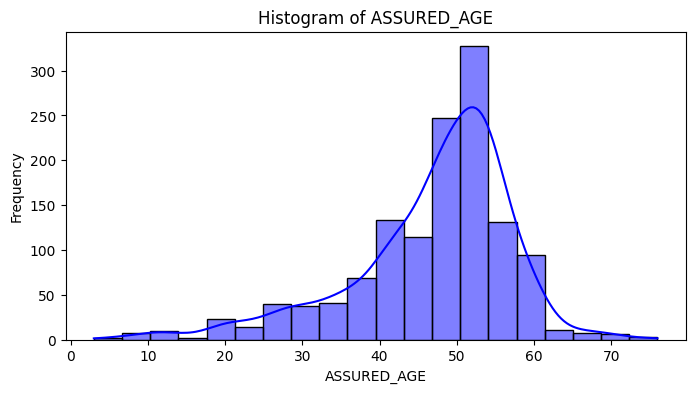

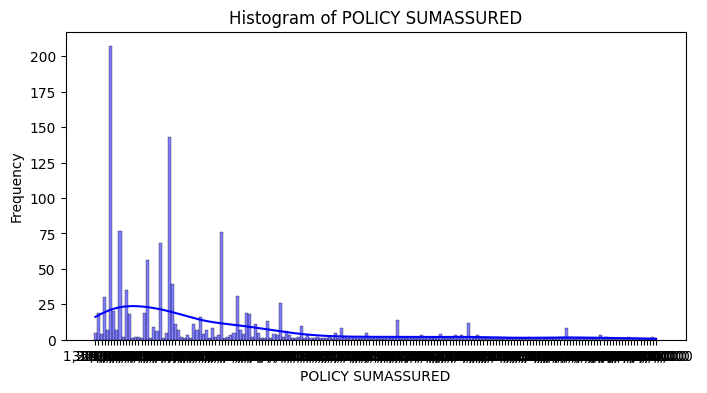

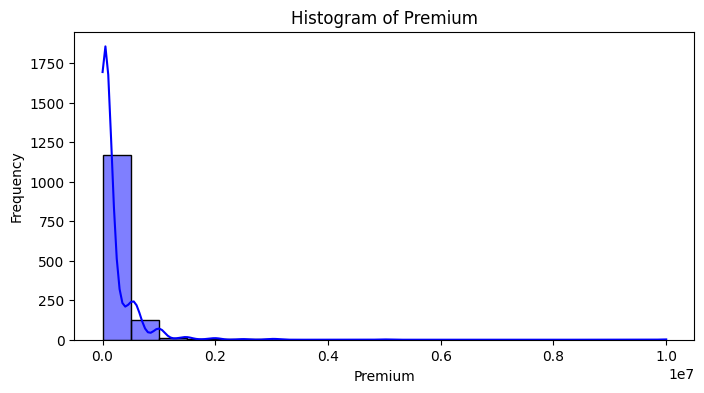

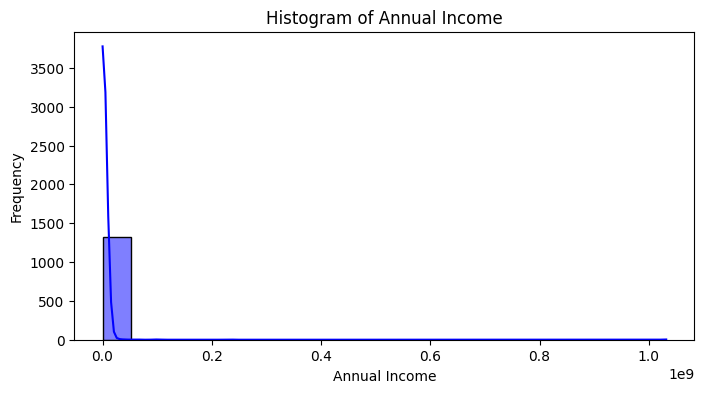

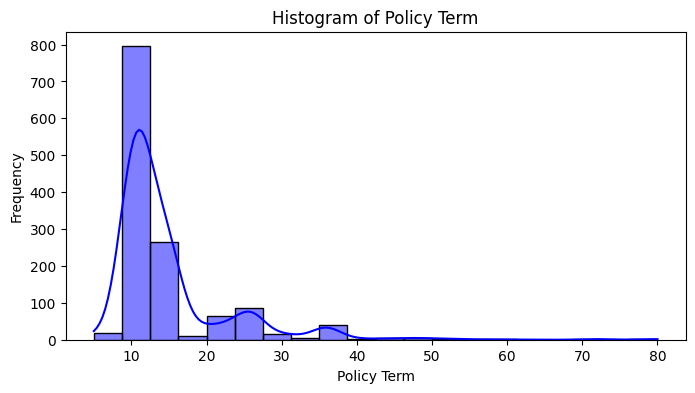

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = ['ASSURED_AGE', 'POLICY SUMASSURED', 'Premium', 'Annual Income', 'Policy Term']
categorical_columns = ['NOMINEE_RELATION', 'Fraud Category']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, color='blue', bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

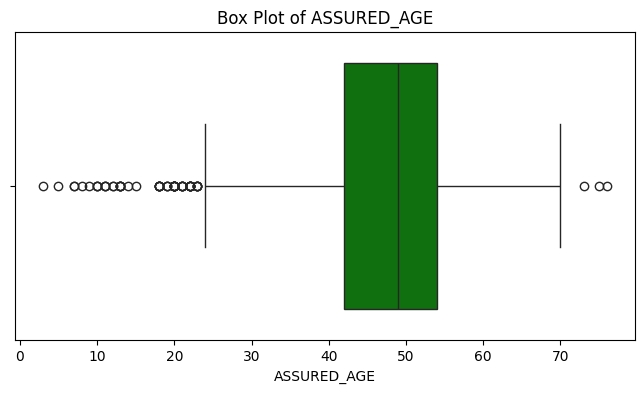

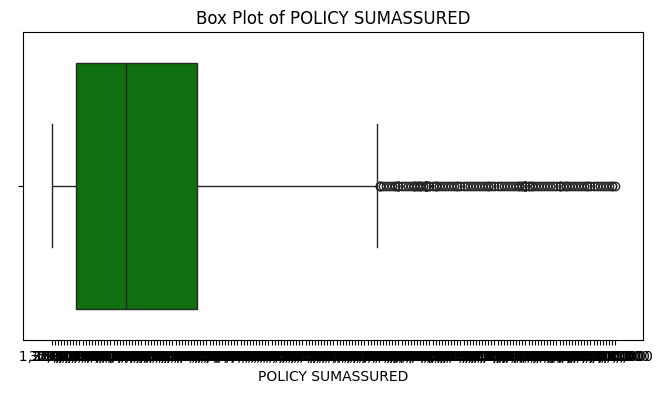

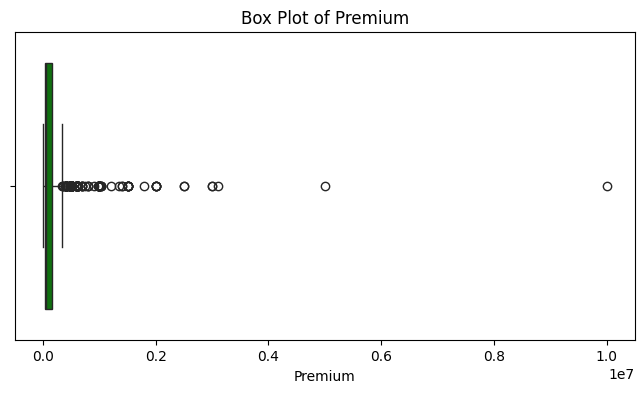

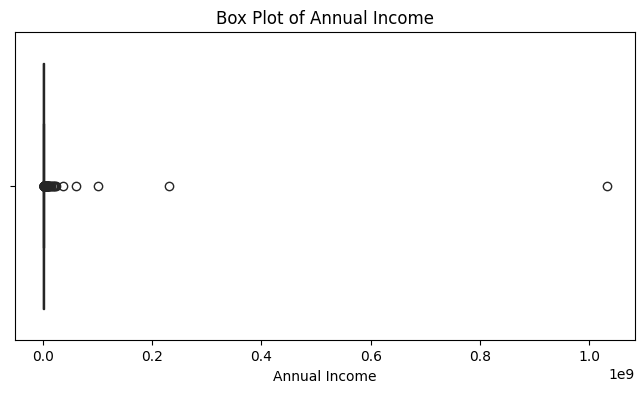

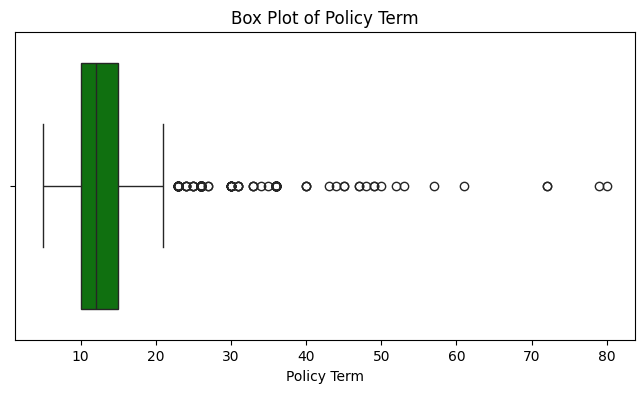

In [28]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col, color='green')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()

C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\3947531780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x='Fraud Category', y='Premium', jitter=True, palette='Set2')


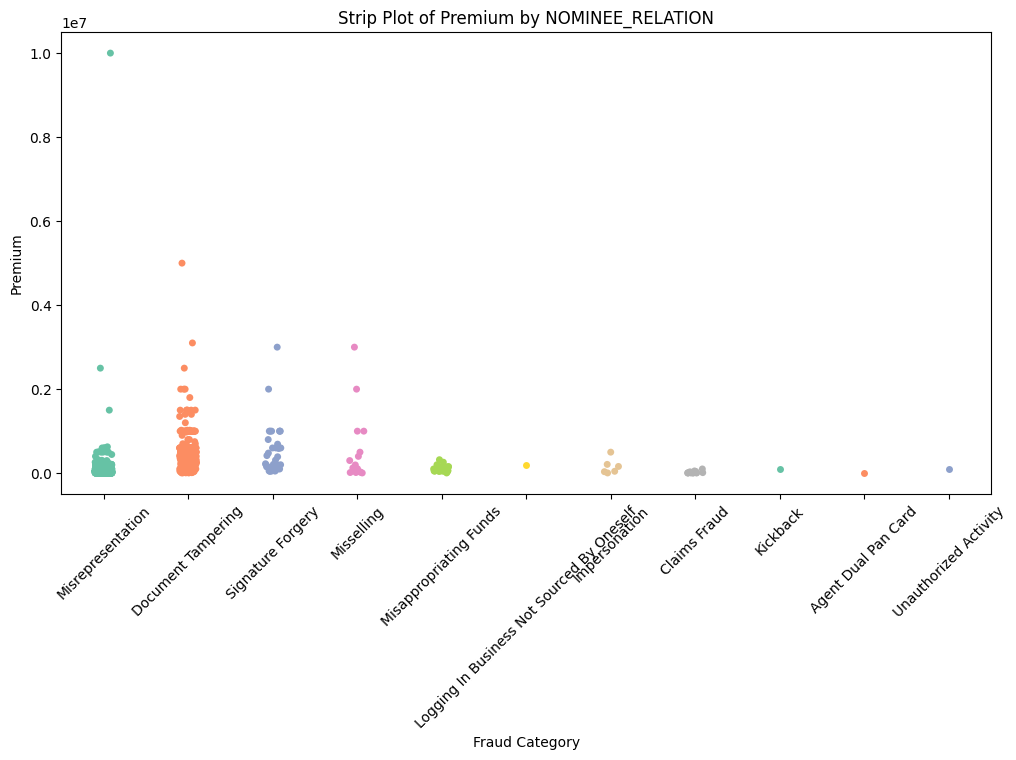

C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\3947531780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x='Fraud Category', y='Premium', jitter=True, palette='Set2')


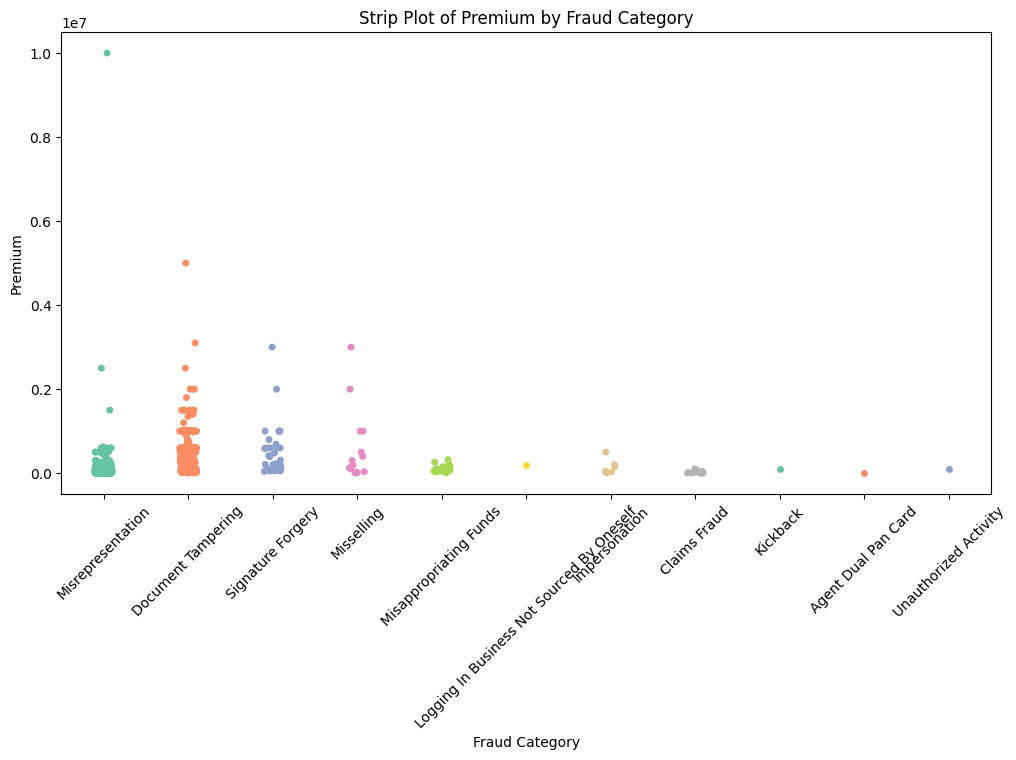

In [29]:
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.stripplot(data=data, x='Fraud Category', y='Premium', jitter=True, palette='Set2')
    plt.title(f"Strip Plot of Premium by {col}")
    plt.xlabel('Fraud Category')
    plt.ylabel('Premium')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\1138706393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='Fraud Category', y='Policy Term', palette='Set3')
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the ma

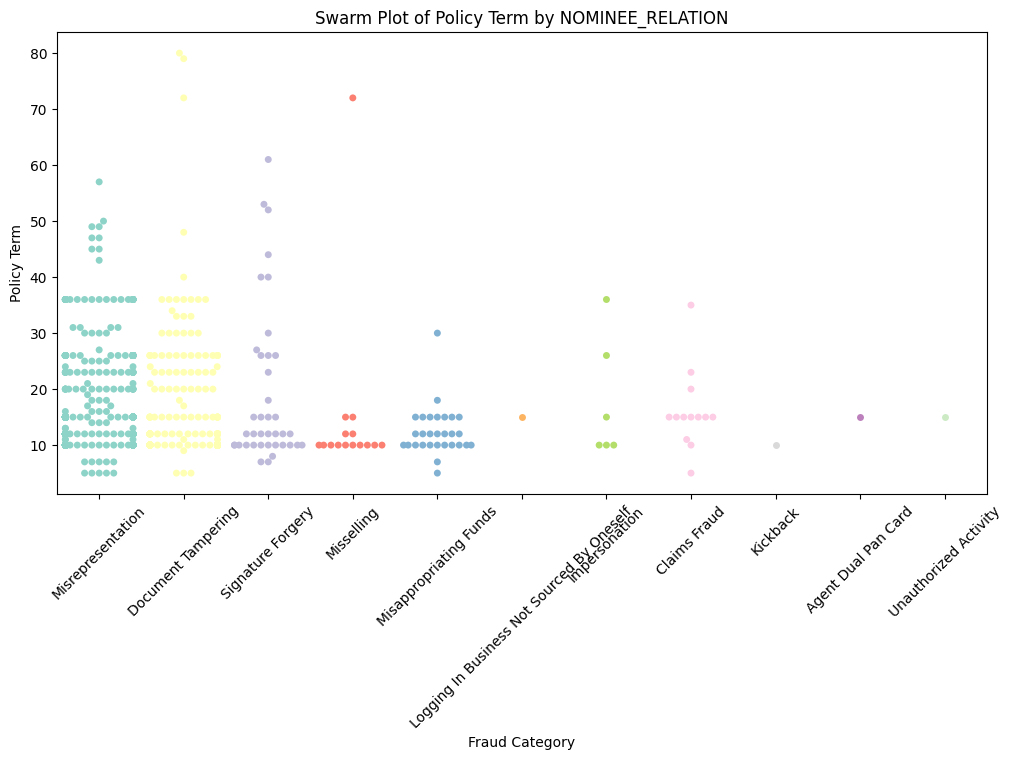

C:\Users\ankus\AppData\Local\Temp\ipykernel_23816\1138706393.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='Fraud Category', y='Policy Term', palette='Set3')
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankus\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the ma

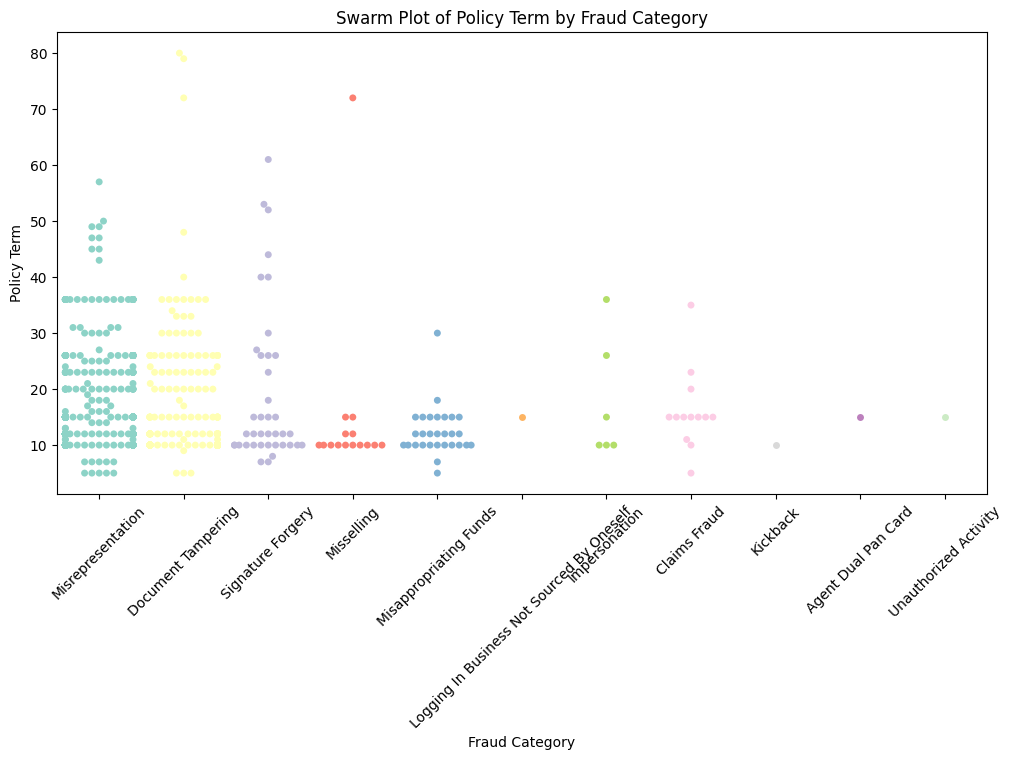

In [31]:
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.swarmplot(data=data, x='Fraud Category', y='Policy Term', palette='Set3')
    plt.title(f"Swarm Plot of Policy Term by {col}")
    plt.xlabel('Fraud Category')
    plt.ylabel('Policy Term')
    plt.xticks(rotation=45)
    plt.show()